In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [48]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [49]:
x_train.ndim

4

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train.ndim

2

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train[0][:5]

array([6], dtype=uint8)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)

In [12]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



# x='airplane automobile bird cat deer dog frog horse ship truck'
# print(x.split())

In [14]:
y_train[0]

6

In [15]:
classes[6]

'frog'

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

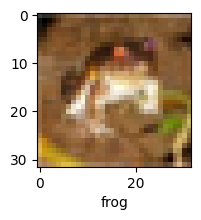

In [17]:
plot_sample(x_train,y_train,0)

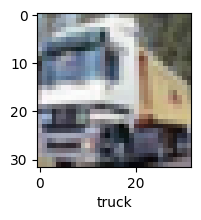

In [18]:
plot_sample(x_train,y_train,1)

In [19]:
x_train=x_train/255.0

In [20]:
x_test=x_test/255.0

In [21]:
from tensorflow.keras import layers, models

In [22]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
   
   
    layers.Dense(10,activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 1.9415 - accuracy: 0.3259
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6831 - accuracy: 0.3973
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6038 - accuracy: 0.4266
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5613 - accuracy: 0.4422
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5278 - accuracy: 0.4575


In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.6315 - accuracy: 0.4216


[1.631534218788147, 0.42160001397132874]

In [24]:
y=model.predict(x_test)

313/313 [==============================] - 5s 17ms/step


In [25]:
y

array([[0.256109  , 0.13353255, 0.7145147 , ..., 0.1661858 , 0.23208122,
        0.05002698],
       [0.82991815, 0.9692196 , 0.17877625, ..., 0.09943292, 0.8521464 ,
        0.92225206],
       [0.9443158 , 0.8203297 , 0.41482267, ..., 0.15472741, 0.76717085,
        0.6789092 ],
       ...,
       [0.03950618, 0.01364987, 0.577776  , ..., 0.5293305 , 0.08892833,
        0.03754863],
       [0.35178137, 0.12404648, 0.6378011 , ..., 0.32771915, 0.03802193,
        0.09845404],
       [0.296756  , 0.0541483 , 0.75032246, ..., 0.9371145 , 0.03013439,
        0.23452172]], dtype=float32)

In [26]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [27]:
y_pred=[np.argmax(i) for i in y]

y_pred[:10]

[3, 1, 0, 0, 4, 6, 3, 6, 2, 1]

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.36      0.56      0.44       640
           1       0.53      0.59      0.56       894
           2       0.50      0.25      0.34      2005
           3       0.25      0.34      0.29       753
           4       0.14      0.46      0.21       293
           5       0.30      0.39      0.34       777
           6       0.63      0.41      0.50      1522
           7       0.68      0.39      0.49      1747
           8       0.41      0.71      0.52       577
           9       0.42      0.53      0.47       792

    accuracy                           0.42     10000
   macro avg       0.42      0.46      0.41     10000
weighted avg       0.49      0.42      0.43     10000



In [29]:
cnn=models.Sequential([
    #cnn implementation
    layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.3401 - accuracy: 0.5215
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9532 - accuracy: 0.6652
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7632 - accuracy: 0.7357
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.5976 - accuracy: 0.7913
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4293 - accuracy: 0.8513
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.2854 - accuracy: 0.9014
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.1807 - accuracy: 0.9392
Epoch 8/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.1318 - accuracy: 0.9552
Epoch 9/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.0979 - accuracy: 0.9670
Epoch 10/10
1563/1563 [==============================] - 82s 53m

In [30]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.6258 - accuracy: 0.6993


[1.625823974609375, 0.6992999911308289]

In [31]:
y=cnn.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [32]:
y

array([[1.34609746e-08, 1.17481744e-04, 4.08026215e-04, ...,
        1.92353591e-10, 5.28370890e-07, 4.89939048e-05],
       [4.21213008e-06, 5.32727599e-01, 1.91294099e-19, ...,
        1.22314676e-17, 4.67267990e-01, 2.20077894e-07],
       [4.00432665e-03, 1.14189656e-02, 9.28472105e-07, ...,
        4.41657066e-05, 9.84078884e-01, 4.27223888e-04],
       ...,
       [1.57385349e-13, 8.39716225e-19, 1.42237889e-02, ...,
        3.23159533e-04, 1.07437266e-13, 3.18130071e-11],
       [6.15000606e-10, 9.96248066e-01, 1.42561328e-06, ...,
        4.04718793e-11, 5.21213498e-12, 6.72055793e-18],
       [5.33883340e-22, 1.90609838e-21, 8.06638164e-20, ...,
        1.00000000e+00, 9.84878543e-18, 1.76234371e-19]], dtype=float32)

In [33]:
y[0]

array([1.34609746e-08, 1.17481744e-04, 4.08026215e-04, 6.88185930e-01,
       1.09512337e-04, 2.98821896e-01, 1.23076728e-02, 1.92353591e-10,
       5.28370890e-07, 4.89939048e-05], dtype=float32)

In [34]:
y_pred=[np.argmax(i) for i in y]

In [35]:
y_pred[:10]

[3, 1, 8, 0, 4, 6, 1, 2, 3, 1]

In [36]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [37]:
y_test=y_test.reshape(-1,)

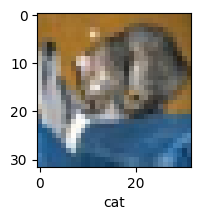

In [38]:
plot_sample(x_test,y_test,0)

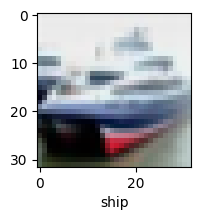

In [45]:
plot_sample(x_test,y_test,1)

In [39]:
classes[3]
# plot_sample(x_train,y_train,0) matched

'cat'

In [46]:
classes[8]

'ship'

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.84      0.83      0.83      1000
           2       0.67      0.54      0.60      1000
           3       0.50      0.51      0.50      1000
           4       0.58      0.73      0.65      1000
           5       0.63      0.57      0.60      1000
           6       0.72      0.79      0.75      1000
           7       0.74      0.74      0.74      1000
           8       0.81      0.80      0.81      1000
           9       0.78      0.81      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [41]:
cm1=tf.math.confusion_matrix(y_test,y_pred)

In [42]:
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[683,  32,  64,  23,  46,   7,  14,  16,  76,  39],
       [ 18, 826,   8,   9,   5,   6,  15,   5,  30,  78],
       [ 64,   6, 538,  61, 110,  82,  63,  49,  16,  11],
       [ 24,   7,  41, 509, 103, 136,  95,  46,  16,  23],
       [ 11,   1,  47,  70, 726,  29,  48,  58,   6,   4],
       [ 13,   0,  31, 189,  76, 572,  44,  58,   6,  11],
       [  6,   6,  40,  68,  49,  24, 785,  13,   6,   3],
       [ 12,   1,  14,  49, 106,  45,  10, 741,   6,  16],
       [ 45,  40,  16,  19,  17,   8,   5,   8, 803,  39],
       [ 27,  68,   7,  19,   9,   6,  13,  11,  30, 810]])>

Text(50.722222222222214, 0.5, 'Prediction')

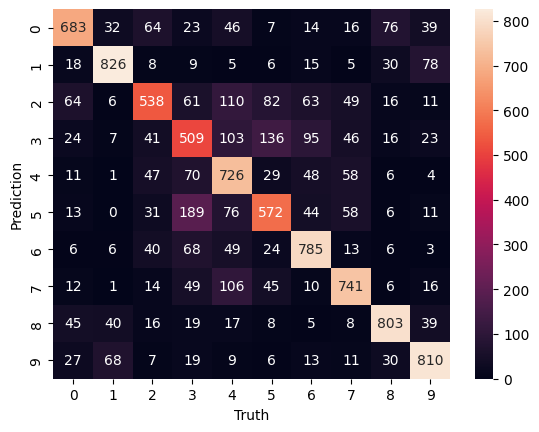

In [43]:

import seaborn as sns
sns.heatmap(cm1,annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Prediction')